In [11]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

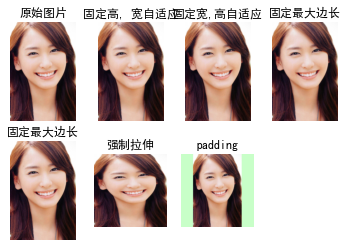

In [24]:
def tomat(pil_img):
    """pil image to cv2 image"""
    img = cv2.cvtColor(np.asarray(pil_img),cv2.COLOR_RGB2BGR)
    return img

def topil(cv2_img):
    """ pil 转 cv2 bgr"""
    return Image.fromarray(cv2.cvtColor(cv2_img,cv2.COLOR_BGR2RGB))

def pad(image, min_height, min_width):
    
    h, w, _ = image.shape
    """ 图片边填充 """
    if h < min_height:
        h_pad_top = int((min_height - h) / 2.0)
        h_pad_bottom = min_height - h - h_pad_top
    else:
        h_pad_top = 0
        h_pad_bottom = 0
    if w < min_width:
        w_pad_left = int((min_width - w) / 2.0)
        w_pad_right = min_width - w - w_pad_left
    else:
        w_pad_left = 0
        w_pad_right = 0

    return cv2.copyMakeBorder(image, h_pad_top,
                              h_pad_bottom,
                              w_pad_left, w_pad_right,
                              cv2.BORDER_CONSTANT,
                              value=(200, 255, 200))


params = { 0: "固定高, 宽自适应",
            1: "固定宽,高自适应",
            2: "固定最大边长",
            3: "固定最大边长",
            4: "强制拉伸",
            5: "padding"
            }
    
def resize(src, limit_w, limit_h, resize_type=4):

    h, w, d = src.shape
    resized_img =  src
    if resize_type == 0:  ##### 固定高, 宽自适应
        limit_length = limit_h
        H = limit_length
        W = int(w * (limit_length / h))
        resized_img = cv2.resize(src, (W, H), cv2.INTER_AREA)

    elif resize_type == 1:  ##### 固定宽,高自适应
        limit_length = limit_w
        W = limit_length
        H = int(h * (limit_length / w))
        resized_img = cv2.resize(src, (W, H), cv2.INTER_AREA)

    elif resize_type == 2:  ######## 固定最大边长
        limit_length = limit_w
        r = limit_length / max(h, w)
        W = int(r * w)
        H = int(r * h)
        resized_img = cv2.resize(src, (W, H), cv2.INTER_AREA)

    elif resize_type == 3:  ######## 固定最小边长
        limit_length = limit_w
        r = limit_length / min(h, w)
        W = int(r * w)
        H = int(r * h)
        resized_img = cv2.resize(src, (W, H), cv2.INTER_AREA)

    elif resize_type == 4:####### 强制拉伸
        resized_img = cv2.resize(src, (limit_w, limit_h), cv2.INTER_AREA)

    elif resize_type == 5:  ####### 等比例拉伸
        r = max(limit_h, limit_w) / max(h, w)
        W = int(r * w)
        H = int(r * h)
        resized_img =  pad(cv2.resize(src, (W, H), cv2.INTER_AREA), limit_h, limit_w)


    else:
        print(f"输入错误：{resize_type}")


    return resized_img




def show_resized_imgs(src, w, h ):
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['SimHei']

    plt.subplot(2,4,1)
    resize_type = -1
    img0 = src[:,:, [2,1,0]]
    plt.title(params.get(resize_type, '原始图片'))
    plt.axis('off') 
    plt.imshow(img0)
    
    plt.subplot(2,4,2)
    resize_type = 0
    img1 = resize(src, w, h, resize_type)[:,:, [2,1,0]]
    plt.title(params.get(resize_type, '原始图片'))
    plt.axis('off') 
    plt.imshow(img1)
    
    plt.subplot(2,4,3)
    resize_type = 1
    img2 = resize(src, w, h, resize_type)[:,:, [2,1,0]]
    plt.title(params.get(resize_type, '原始图片'))
    plt.axis('off') 
    plt.imshow(img2)

    plt.subplot(2,4,4)
    resize_type = 2
    img3 = resize(src, w, h, resize_type)[:,:, [2,1,0]]
    plt.title(params.get(resize_type))
    plt.axis('off') 
    plt.imshow(img3)


    plt.subplot(2,4,5)
    resize_type = 3
    img4 = resize(src, w, h, resize_type)[:,:, [2,1,0]]
    plt.title(params.get(resize_type, '原始图片'))
    plt.axis('off') 
    plt.imshow(img4)


    plt.subplot(2,4,6)
    resize_type = 4
    img5 = resize(src, w, h, resize_type)[:,:, [2,1,0]]
    plt.title(params.get(resize_type, '原始图片'))
    plt.axis('off') 
    plt.imshow(img5)

    plt.subplot(2,4,7)
    resize_type = 5
    img6 = resize(src, w, h, resize_type)[:,:, [2,1,0]]
    plt.title(params.get(resize_type, '原始图片'))
    plt.axis('off') 
    plt.imshow(img6)
    
    
src = cv2.imread('imgs/1.jpg')
show_resized_imgs(src, 320, 320)
    

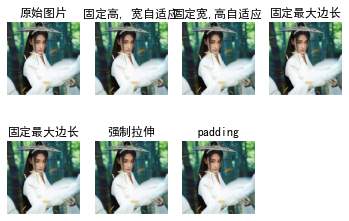

In [27]:
src = cv2.imread('imgs/4.jpg')
show_resized_imgs(src, 500, 500)

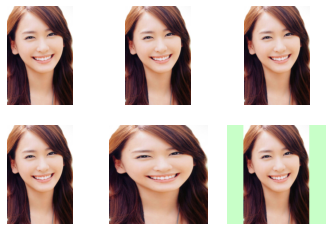

In [12]:

# plt.figure()

plt.subplot(2,3,1)
# img0 = src[:,:,[2,1,0]]
img0 = resize(src, 320, 320, 0)[:,:, [2,1,0]]
plt.axis('off') 
plt.imshow(img0)


plt.subplot(2,3,2)
img1 = resize(src, 320, 320, 1)[:,:, [2,1,0]]
plt.axis('off') 
plt.imshow(img1)

plt.subplot(2,3,3)
img2 = resize(src, 320, 320, 2)[:,:, [2,1,0]]
plt.axis('off') 
plt.imshow(img2)

plt.subplot(2,3,4)
img4 = resize(src, 320, 320, 3)[:,:, [2,1,0]]
plt.axis('off') 
plt.imshow(img4)

plt.subplot(2,3,5)
img5 = resize(src, 320, 320, 4)[:,:, [2,1,0]]
plt.axis('off') 
plt.imshow(img5)


img6 = resize(src, 320, 320, 5)[:,:, [2,1,0]]
plt.subplot(2,3,6)
plt.imshow(img6)

# plt.xticks([])  # 去掉x轴
# plt.yticks([])  # 去掉y轴
plt.axis('off')  # 去掉坐标轴
plt.show()



In [5]:
num_page = 50
page_gap = 5
for i, page in enumerate(range(0, num_page, page_gap)):
    
    for index in range(page, page + page_gap):
        print(f"page = {page}, index={index}")


page = 0, index=0
page = 0, index=1
page = 0, index=2
page = 0, index=3
page = 0, index=4
page = 5, index=5
page = 5, index=6
page = 5, index=7
page = 5, index=8
page = 5, index=9
page = 10, index=10
page = 10, index=11
page = 10, index=12
page = 10, index=13
page = 10, index=14
page = 15, index=15
page = 15, index=16
page = 15, index=17
page = 15, index=18
page = 15, index=19
page = 20, index=20
page = 20, index=21
page = 20, index=22
page = 20, index=23
page = 20, index=24
page = 25, index=25
page = 25, index=26
page = 25, index=27
page = 25, index=28
page = 25, index=29
page = 30, index=30
page = 30, index=31
page = 30, index=32
page = 30, index=33
page = 30, index=34
page = 35, index=35
page = 35, index=36
page = 35, index=37
page = 35, index=38
page = 35, index=39
page = 40, index=40
page = 40, index=41
page = 40, index=42
page = 40, index=43
page = 40, index=44
page = 45, index=45
page = 45, index=46
page = 45, index=47
page = 45, index=48
page = 45, index=49
